# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset(('tips'))
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


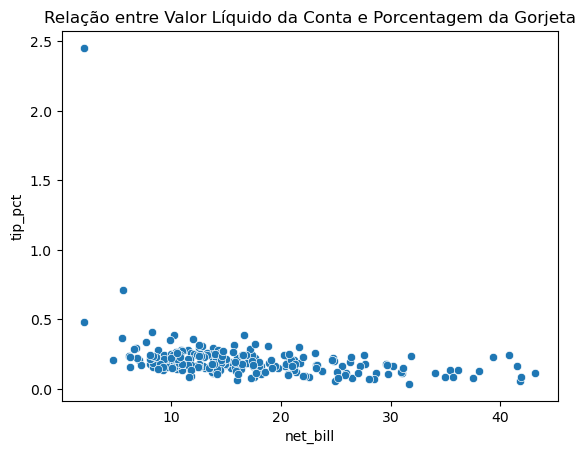

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        00:42:34   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

In [7]:
# Análise Exploratória de Dados
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.title('Relação entre Valor Líquido da Conta e Porcentagem da Gorjeta')
plt.show()

# Modelo de Regressão Linear Simples
model = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(model.summary())

# Modelo de Regressão com Transformação Logarítmica
model_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(model_log.summary())

# Modelo com Variáveis Adicionais (Exemplo)
model_add = smf.ols('tip_pct ~ net_bill + size', data=tips).fit()
print(model_add.summary())

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [9]:
import numpy as np
import statsmodels.formula.api as smf

# Modelo com logaritmo de net_bill
model_log = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.62e-13
Time:                        00:45:50   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

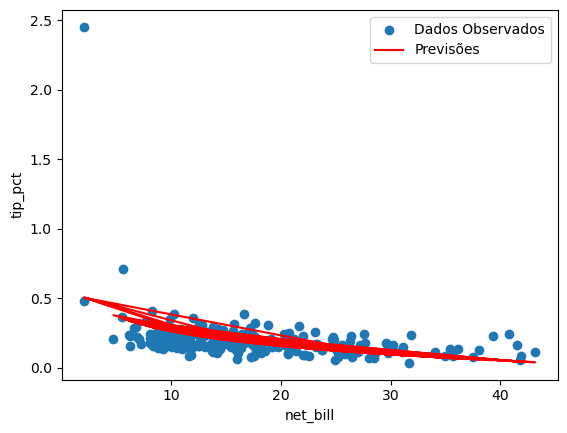

In [11]:
# Previsões do modelo
predictions = model_log.predict(tips)

# Plot
plt.scatter(tips['net_bill'], tips['tip_pct'], label='Dados Observados')
plt.plot(tips['net_bill'], predictions, color='red', label='Previsões')
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.legend()
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [15]:
# Criando a variável quadrática
tips['net_bill_sq'] = tips['net_bill']**2

# Modelo com polinômio de segundo grau
model_quad = smf.ols('tip_pct ~ net_bill + net_bill_sq', data=tips).fit()
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.06e-09
Time:                        00:51:17   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4851      0.047     10.332      

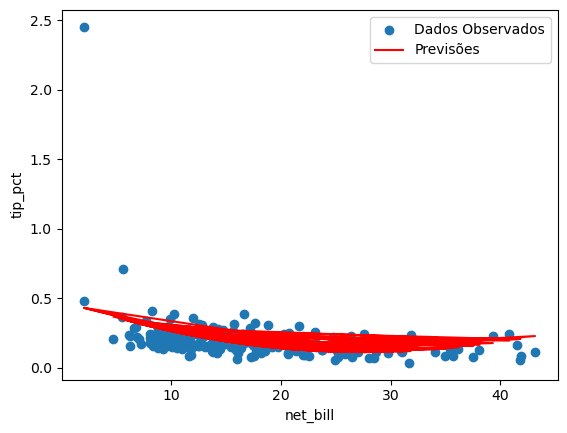

In [17]:
# Previsões do modelo
predictions = model_quad.predict(tips)

# Plot
plt.scatter(tips['net_bill'], tips['tip_pct'], label='Dados Observados')
plt.plot(tips['net_bill'], predictions, color='red', label='Previsões')
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.legend()
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [19]:
# Modelo com logaritmo de tip_pct
model_log_tip = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(model_log_tip.summary())

# Previsões em escala logarítmica
predictions_log = model_log_tip.predict(tips)

# Transformando as previsões para a escala original
predictions = np.exp(predictions_log)

# Calculando o R² na escala original
from sklearn.metrics import r2_score
r2 = r2_score(tips['tip_pct'], predictions)
print('R² na escala original:', r2)

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           8.27e-16
Time:                        00:52:04   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

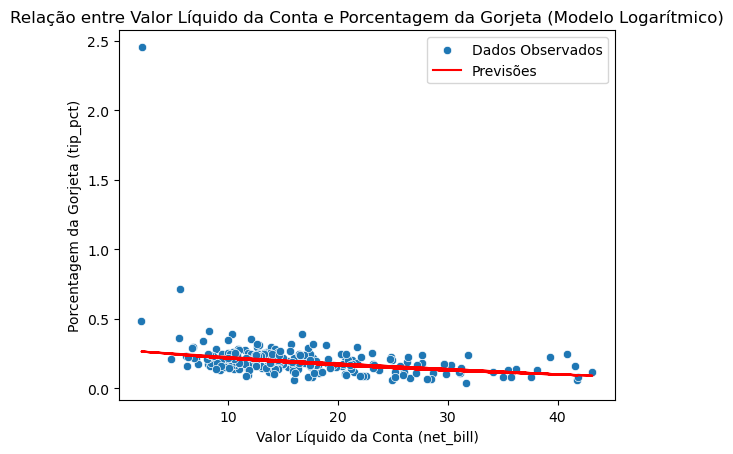

In [21]:
# Criando o gráfico
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Dados Observados')
plt.plot(tips['net_bill'], predictions, color='red', label='Previsões')

# Adicionando um intervalo de confiança (opcional)
# ... (calcular o intervalo de confiança usando statsmodels ou outras bibliotecas)
# plt.fill_between(tips['net_bill'], lower_bound, upper_bound, alpha=0.2, color='red')

plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.title('Relação entre Valor Líquido da Conta e Porcentagem da Gorjeta (Modelo Logarítmico)')
plt.legend()
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [27]:
# Modelo com logaritmo em ambas as variáveis
model_double_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(model_double_log.summary())

# Previsões em escala logarítmica
predictions_log = model_double_log.predict(tips)

# Transformando as previsões para a escala original
predictions = np.exp(predictions_log)

# Calculando o R² na escala original
from sklearn.metrics import r2_score
r2 = r2_score(tips['tip_pct'], predictions)
print('R² na escala original:', r2)

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           5.20e-20
Time:                        00:58:31   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

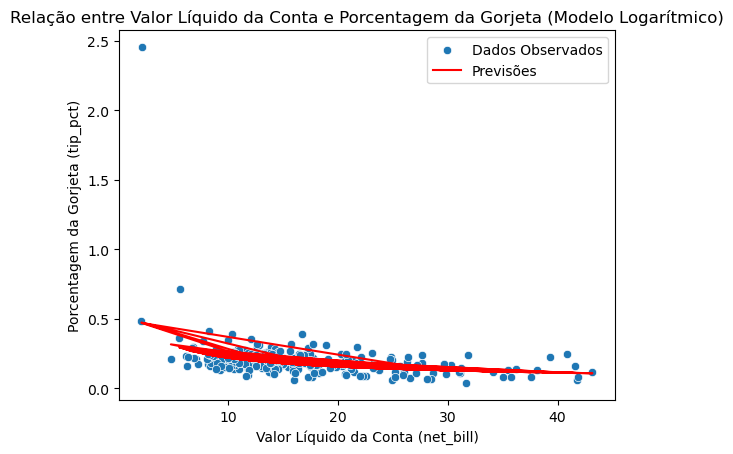

In [33]:
# Criando o gráfico
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Dados Observados')
plt.plot(tips['net_bill'], predictions, color='red', label='Previsões')

# Adicionando um intervalo de confiança (opcional)
# ... (calcular o intervalo de confiança usando statsmodels ou outras bibliotecas)
# plt.fill_between(tips['net_bill'], lower_bound, upper_bound, alpha=0.2, color='red')

plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.title('Relação entre Valor Líquido da Conta e Porcentagem da Gorjeta (Modelo Logarítmico)')
plt.legend()
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [39]:

tips['pred'] = reg.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.3021437558623868

In [43]:
tips['pred'] = model_log.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.44914234088544236

In [47]:

tips['pred'] = model_quad.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.3969985482882293

In [53]:
tips['pred'] = model_log_tip.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.30214375586238695

In [55]:
tips['pred'] = model_double_log.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

0.4491423408854422